## Implement k-Means clustering

In [25]:
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt

### Preparation: Generate data to use for testing k-means clustering

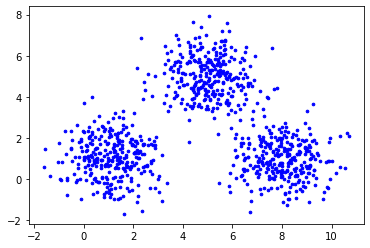

In [26]:
# generate random data 
gt_1 = np.array([1,1])
gt_2 = np.array([5,5])
gt_3 = np.array([8,1])
data_1 = np.random.randn(300,2) + gt_1
data_2 = np.random.randn(300,2) + gt_2
data_3 = np.random.randn(300,2) + gt_3
data = np.concatenate((data_1, data_2, data_3),axis = 0)
plt.scatter(data[:,0], data[:,1], s=7,c='b')

In [27]:
# Compare to sklearn.cluster.means
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data)
print('--------------------- KMeans result --------------------')
print(kmeans.inertia_)
print(kmeans.cluster_centers_)

--------------------- KMeans result --------------------
1747.790357045329
[[1.11408651 1.03207003]
 [5.02463196 5.00616972]
 [8.01740675 0.94788396]]


In [29]:
kmeans.cluster_centers_[:,0]

array([1.11408651, 5.02463196, 8.01740675])

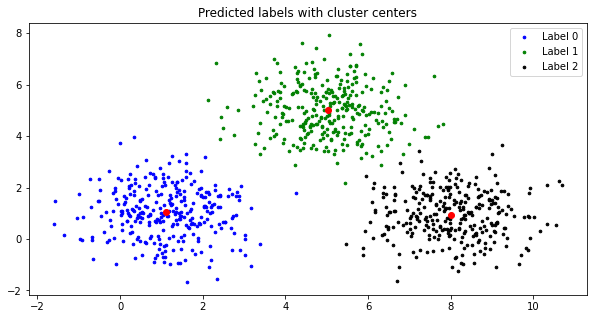

In [30]:
data_df = pd.DataFrame(data, columns=['x','y'])
data_df['label'] = kmeans.labels_
c = ['b', 'g', 'k']
plt.figure(figsize=(10,5))

for i in range(3):
    data_temp = data_df[data_df['label'] == i]
    plt.scatter(data_temp['x'], data_temp['y'], s=7, c=c[i], label = f'Label {i}')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='r')
plt.legend()
plt.title('Predicted labels with cluster centers')
plt.show()

## Choose the best number of clusters



In [ ]:
# Plot the WCSS according to the number of clusters

In [36]:
for k in range(3,40,3):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(data)
    print(f'--------------------- KMeans result {k} clusters --------------------')
    print(kmeans.inertia_)

--------------------- KMeans result 3 clusters --------------------
1747.790357045329
--------------------- KMeans result 6 clusters --------------------
1134.136526494544
--------------------- KMeans result 9 clusters --------------------
765.230430700654
--------------------- KMeans result 12 clusters --------------------
579.3670924792286
--------------------- KMeans result 15 clusters --------------------
486.6782726498379
--------------------- KMeans result 18 clusters --------------------
414.7594752219154
--------------------- KMeans result 21 clusters --------------------
349.23821770960063
--------------------- KMeans result 24 clusters --------------------
312.50483638987146
--------------------- KMeans result 27 clusters --------------------
276.90834759586664
--------------------- KMeans result 30 clusters --------------------
252.14555537083842
--------------------- KMeans result 33 clusters --------------------
227.62493574913282
--------------------- KMeans result 36 clu

In [1]:
# Now let's compute the WSS

In [3]:
# First create a function that compute the distance between two points
# See the formula below

Euclidian distance between two points

$ X_1: (x_1, y_1), X_2: (x_2, y_2) $ 

$ distance = \sqrt((x_2 - x_1)^2 + (y_2 - y_1)^2) $


In [4]:
def distance_2_points(x,y):
    return None

In [12]:
# Now compute the distance between the point (5,5) and all data points
# Hint: Use broadcasting of arrays in numpy and np.sum.

In [21]:
print(f"Before: \n {data[:5]} \n \n After broadcasting [[5,5]]: \n \n {data - [[5,5]]}")

Before: 
 [[ 0.1617298  -0.4917315 ]
 [ 1.00569293  0.10444564]
 [ 1.05930496  1.23895125]
 [ 2.308823    2.3432443 ]
 [ 2.44646892  3.84868075]] 
 
 After broadcasting [[5,5]]: 
 
 [[-4.8382702  -5.4917315 ]
 [-3.99430707 -4.89555436]
 [-3.94069504 -3.76104875]
 ...
 [ 1.482286   -5.33292895]
 [ 2.31333378 -4.77308655]
 [ 2.17392107 -5.36162727]]


In [7]:
def wcss_0(data, center = [[5,5]]):
    return None

In [22]:
# Now compute the wcss given by the model above.
def wcss(data, label, centers):
    return None
    